|   Proceso | Error Biseccion Error RPV   | Falsa Posicion Error RPV   |   Comparacion |
|----------:|:----------------------------|:---------------------------|--------------:|
|         1 | 5.27868364433 %             | 0.887018978808 %           |   4.39166     |
|         2 | 1.48712466678 %             | 0.0946724895539 %          |   1.39245     |
|         3 | 1.89577948878 %             | 0.0101171697496 %          |   1.88566     |
|         4 | 0.204327410996 %            | 0.00110176456332 %         |   0.203226    |
|         5 | 0.641398627894 %            | 0.000140619920844 %        |   0.641258    |
|         6 | 0.218535608449 %            | 3.81520066919e-05 %        |   0.218497    |
|         7 | 0.00710409872667 %          | 2.72278837952e-05 %        |   0.00707687  |
|         8 | 0.0986116561346 %           | 2.60632612035e-05 %        |   0.0985856   |
|         9 | 0.0457537787039 %           | 2.59391005643e-05 %        |   0.0457278   |
|        10 | 0.01932

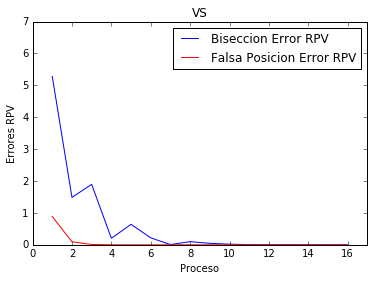

In [23]:
import math
from tabulate import tabulate
import matplotlib.pyplot as plt
%matplotlib inline

xVerd=14.7802
m=68.1
g=9.8
v=40.0
t=10.0
xl=12.0
xu=16.0
xr=0.0
fA=1.0
fB=1.0
fr1=1.0
fr2=1.0
fr3=1.0
xl2=12.0
xu2=16.0
xr2=0.0
Error1=[]
Error2=[]
tabla=[]
contador=[]
aux1=[]
aux2=[]
cont=0

def metodo1(num):
    fc=((g*m)/num)*(1-math.exp(-(num/68.1)*10.0))-v
    return fc
    
while ((fA*fB)!=0):
    xr=(xl+xu)/2
    fA=metodo1(xl)
    fB=metodo1(xr)
    erpv=math.fabs(((xVerd-xr)/xVerd)*100)
    Error1.append(erpv)
    if ((fA*fB)<0):
        xu=xr
    if((fA*fB)>0):
         xl=xr   

while ((fr1*fr3)!=0):
    fr1=metodo1(xl2)
    fr2=metodo1(xu2)
    xr2=xu2-(fr2*(xl2-xu2))/(fr1-fr2)
    fr3=metodo1(xr2)
    erpv2=math.fabs(((xV-xr2)/xV)*100)
    Error2.append(erpv2)
    if ((fr1*fr3)<0):
        xu2=xr2
    if((fr1*fr3)>0):
         xl2=xr2 

for d in range (len(Error2)):
    diferencia=Error1[d]-Error2[d]
    cont+=1
    contador.append(cont)
    aux1.append(Error1[d])
    aux2.append(Error2[d])
    tabla.append([cont, str(Error1[d])+" %", str(Error2[d])+" %", diferencia])

print tabulate(tabla, headers=["Proceso", "Error Biseccion Error RPV", "Falsa Posicion Error RPV", "Comparacion"], tablefmt="pipe")

plt.title("VS")
plt.axis([0, 17, 0, 7])
plt.ylabel('Errores RPV')
plt.xlabel('Proceso')
plt.plot(contador, aux1, 'b-', label="Biseccion Error RPV ")
plt.plot(contador, aux2, 'r-', label="Falsa Posicion Error RPV")
plt.legend(loc = 'upper right', numpoints = 2)
plt.show()